### Applied Non-Linear Regression Algorithm Using China-GDP Dataset

#### Importing required libraries

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

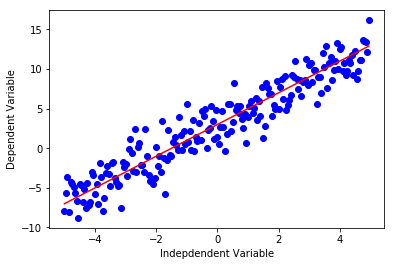

In [91]:
# let's generate new data points

x = np.arange(-5.0, 5.0, 0.05)

# we can adjust the slope and intercept to verify the changes in the graph
y = 2*(x) + 3
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise

#plt.figure(figsize=(8,6))
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

Essentially any relationship that is not linear can be termed as non-linear. Let's use the following formula:

$$ \ y = a x^3 + b x^2 + c x + d \ $$


Let's take a look at a cubic function's graph.

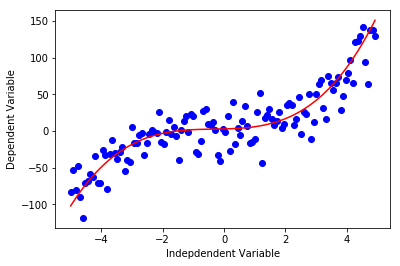

In [92]:
# let's generate some data points
x = np.arange(-5.0, 5.0, 0.08)

y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise

plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

#### Let's take a look with some other types of non-linear functions

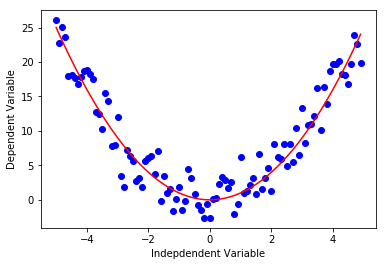

In [93]:
## Quadratic

# let's generate some data points
x = np.arange(-5.0, 5.0, 0.1)

y = np.power(x,2)         
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise

plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [94]:
np.exp(1), np.exp(0), np.log(np.exp(1))

(2.718281828459045, 1.0, 1.0)

C:\Users\bista\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


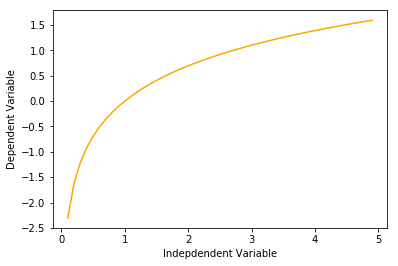

In [95]:
## Logarithmic

# generate some data points
X = np.arange(-5.0, 5.0, 0.1)

Y = np.log(X)

plt.plot(X,Y,'orange') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

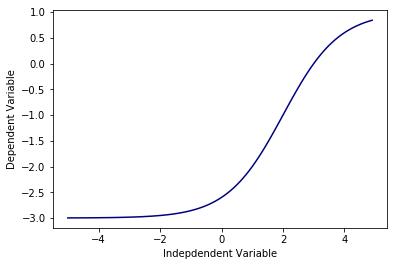

In [96]:
## Sigmoidal/Logistic

# generate some data points
X = np.arange(-5.0, 5.0, 0.1)


Y = 1-4/(1+np.power(3, X-2))

plt.plot(X,Y,'navy') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

#### Applied non-linear regression algorithm

We're going to fit a non-linear model to the datapoints corrensponding to China's GDP from 1960 to 2014.

In [97]:
import numpy as np
import pandas as pd
  
df = pd.read_excel("china_gdp.xlsx")
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


In [98]:
df.Value.describe()

count    5.500000e+01
mean     1.437042e+12
std      2.500085e+12
min      4.668518e+10
25%      1.395123e+11
50%      3.074796e+11
75%      1.268748e+12
max      1.035483e+13
Name: Value, dtype: float64

In [99]:
df.corr()

,Year,Value
Year,1.000000,0.723858
Value,0.723858,1.000000


In [100]:
np.dtype(df['Value'])

dtype('float64')

#### Plotting the dataset 
It kind of looks like an either logistic or exponential function. 

The growth starts off slow, then from 2005 on forward, the growth is very significant. And finally, it deaccelerates slightly in the 2010s.

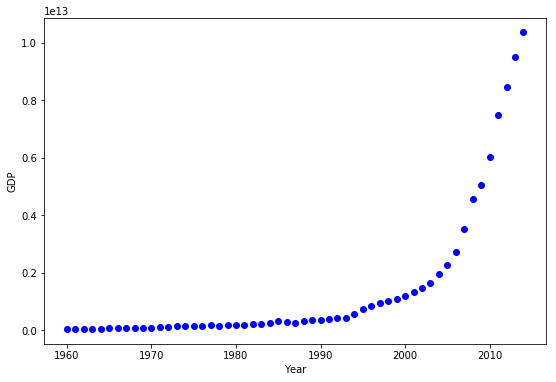

In [101]:
plt.figure(figsize=(9,6))
x_data, y_data = (df["Year"].values, df["Value"].values)        

plt.plot(x_data, y_data,'bo')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

#### Building the model
Now, let's build our regression model and initialize its parameters. 

In [102]:
# define a function with the formula applied:

def sigmoid_func(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))      
     return y

Let's look at a sample sigmoid line that might fit (might not) with the data:

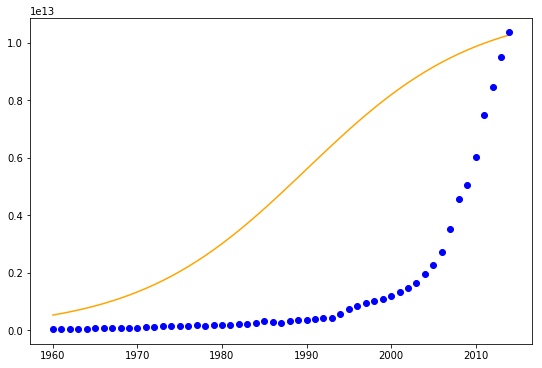

In [116]:
# initializing
beta_1 = 0.10
beta_2 = 1990.0

#logistic function
Y_pred = sigmoid_func(x_data, beta_1 , beta_2)

plt.figure(figsize=(9,6))
#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*11200000000000, 'orange')
plt.plot(x_data, y_data, 'bo')

Here our task is to find the best parameters for our model. Lets first normalize our x and y:

In [104]:
# normalizing

xdata = x_data/max(x_data)
ydata = y_data/max(y_data)

In [105]:
# let's import another library
from scipy.optimize import curve_fit

In [106]:
beta, pc = curve_fit(sigmoid_func, xdata, ydata)

#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (beta[0], beta[1]))
print(pc)
print('------------------------------------------------------------------')
print(xdata)
print(ydata)

 beta_1 = 690.451712, beta_2 = 0.997207
[[ 1.52271494e+03 -2.88118935e-04]
 [-2.88118935e-04  7.25961451e-09]]
------------------------------------------------------------------
[0.97318769 0.97368421 0.97418073 0.97467726 0.97517378 0.97567031
 0.97616683 0.97666336 0.97715988 0.97765641 0.97815293 0.97864945
 0.97914598 0.9796425  0.98013903 0.98063555 0.98113208 0.9816286
 0.98212512 0.98262165 0.98311817 0.9836147  0.98411122 0.98460775
 0.98510427 0.98560079 0.98609732 0.98659384 0.98709037 0.98758689
 0.98808342 0.98857994 0.98907646 0.98957299 0.99006951 0.99056604
 0.99106256 0.99155909 0.99205561 0.99255214 0.99304866 0.99354518
 0.99404171 0.99453823 0.99503476 0.99553128 0.99602781 0.99652433
 0.99702085 0.99751738 0.9980139  0.99851043 0.99900695 0.99950348
 1.        ]
[0.0057156  0.00478589 0.00450854 0.00483806 0.00570384 0.00673204
 0.00732793 0.00695878 0.0067595  0.00760213 0.00883705 0.00951846
 0.01083164 0.01320831 0.01373801 0.01556399 0.01464318 0.01664431
 0.014

Now we plot our resulting regresssion model.

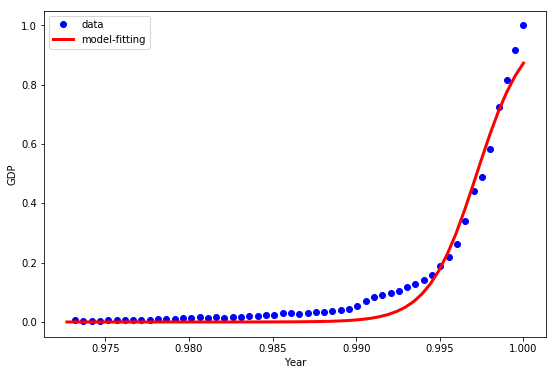

In [118]:
x = np.linspace(1960, 2015, 55)   
x = x/max(x)

plt.figure(figsize=(9,6))

y = sigmoid_func(x, *beta)         
plt.plot(xdata, ydata, 'bo', label='data')
plt.plot(x,y, 'r',linewidth=3.0, label='model-fitting')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [108]:
sigmoid_func(x, beta[0],beta[1])

array([4.49492044e-08, 6.37222922e-08, 9.03359816e-08, 1.28064908e-07,
       1.81551360e-07, 2.57376484e-07, 3.64870042e-07, 5.17258373e-07,
       7.33291795e-07, 1.03955167e-06, 1.47372104e-06, 2.08922111e-06,
       2.96178422e-06, 4.19877176e-06, 5.95238338e-06, 8.43838246e-06,
       1.19626408e-05, 1.69587674e-05, 2.40414467e-05, 3.40820435e-05,
       4.83157620e-05, 6.84935158e-05, 9.70971372e-05, 1.37644291e-04,
       1.95120377e-04, 2.76590097e-04, 3.92062992e-04, 5.55717574e-04,
       7.87630879e-04, 1.11621867e-03, 1.58167138e-03, 2.24077810e-03,
       3.17367164e-03, 4.49320371e-03, 6.35786451e-03, 8.98936416e-03,
       1.26961163e-02, 1.79037292e-02, 2.51928631e-02, 3.53428215e-02,
       4.93749707e-02, 6.85822171e-02, 9.45183317e-02, 1.28905396e-01,
       1.73407087e-01, 2.29229146e-01, 2.96573656e-01, 3.74100310e-01,
       4.58678280e-01, 5.45706219e-01, 6.30028272e-01, 7.07099725e-01,
       7.73878240e-01, 8.29111359e-01, 8.73065987e-01])

#### Evaluation

In [109]:
## Evaluation....

# split data into train/test
msk = np.random.rand(len(df)) < 0.85
train_x = xdata[msk]
test_x = xdata[~msk]

train_y = ydata[msk]
test_y = ydata[~msk]

In [110]:
# finding the best "beta"
ebeta, epc = curve_fit(sigmoid_func, train_x, train_y)     

In [111]:
print(" beta_1 = %f, beta_2 = %f" % (ebeta[0], ebeta[1]))

 beta_1 = 686.666175, beta_2 = 0.997196


In [112]:
# predict using test set
# y_hat = sigmoid_func(test_x, beta[0],beta[1])   
y_hat = sigmoid_func(test_x, *ebeta)  

In [115]:
# evaluation
#print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
#print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))      

from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )     

R2-score: 0.88
